# Multilayer Perceptron Implementation From Scratch

## Importing Necessary Libraries

In [1]:
import numpy as np                                        # Handling scientific operations
import pandas as pd                                       # Importing data from a .csv file
import matplotlib.pyplot as plt                           # Visualizing confusion matrix

## Importing the Dataset

In [2]:
data = pd.read_csv('./Social_Network_Ads.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Splitting Dataset into Training, Cross Validation and Test sets

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_, y_train, y_ = train_test_split(X, y, train_size = 0.6, random_state = 42)
X_test, X_CV, y_test, y_CV = train_test_split(X_, y_, test_size = 0.5, random_state = 42)

## Feature Scaling

In [4]:
# We perform feature scaling after train test split to avoid information leakage
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_CV = sc.transform(X_CV)
X_test = sc.transform(X_test)

## Defining Multilayer Perceptron (MLP) Class

In [5]:
class MLP(object):
    
    def __init__(self, num_inputs=2, hidden_layers=[3,4], num_outputs=1):
        self.num_inputs = num_inputs
        self.hidden_layers = hidden_layers
        self.num_outputs = num_outputs
        
        layers = [num_inputs] + hidden_layers + [num_outputs]
        
        weights = []
        for i in range(len(layers) - 1):
            w = np.random.rand(layers[i], layers[i + 1])
            weights.append(w)
        self.weights = weights
        
        biases = []
        for i in range(len(layers) - 1):
            b = np.zeros((1, layers[i + 1]))
            biases.append(b)
        self.biases = biases
        
        
        activations = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activations.append(a)
        self.activations = activations
        
        
        derivatives = []
        for i in range(len(layers) - 1):
            d = np.zeros((layers[i], layers[i + 1]))
            derivatives.append(a)
        self.derivatives = derivatives
        
        deltas = []
        for i in range(len(layers)):
            d = np.zeros(layers[i])
            deltas.append(d)
        self.deltas = deltas

    def forward_propagate(self, inputs):
        
        self.activations[0] = inputs
        
        for i, (w, b) in enumerate(zip(self.weights, self.biases)):   
            z = np.dot(self.activations[i], w) + b
            self.activations[i + 1] = self._sigmoid(z)
        
        return self.activations[-1]
    
    
    def back_propagate(self, error):
        
        delta = error
        self.deltas[-1] = error
        for i in reversed(range(len(self.weights))):
            self.derivatives[i] = np.dot(self.activations[i].T, delta)
            delta = np.dot(delta, self.weights[i].T) * (self.activations[i] * (1 - self.activations[i]))

            self.deltas[i] = delta
            
    def gradient_descent(self, alpha=0.01):
        
        for i in range(len(self.weights)):
            self.weights[i] = self.weights[i] - alpha * self.derivatives[i]
            self.biases[i] = self.biases[i] - alpha * np.sum(self.deltas[i+1], axis=0)

    
    def train(self, X, y, epochs = 1000):
        for i in range(epochs):
            y_hat = mlp.forward_propagate(X)
            error = y_hat - y.reshape(len(y), 1)
            self.back_propagate(error)
            self.gradient_descent()
    
    def predict(self, X):
        
        return [1 if _ >= 0.5 else 0 for _ in self.forward_propagate(X)]
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

## Instantiating and Fitting the Model

In [6]:
mlp = MLP()
mlp.train(X_train,y_train)

## Predicting Results

In [7]:
y_train_pred = mlp.predict(X_train)
y_CV_pred = mlp.predict(X_CV)
y_test_pred = mlp.predict(X_test)

## Evaluating Model Performance and Displaying Confusion Matrix

Training set accuracy         % 91.66666666666666
Cross validation set accuracy % 92.5
Test set accuracy             % 93.75


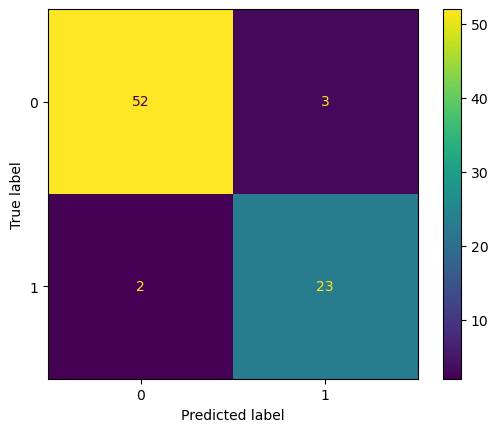

In [8]:
from sklearn import metrics
print("Training set accuracy         %", metrics.accuracy_score(y_train, y_train_pred) * 100)
print("Cross validation set accuracy %", metrics.accuracy_score(y_CV, y_CV_pred) * 100)
print("Test set accuracy             %", metrics.accuracy_score(y_test, y_test_pred) * 100)

cm = metrics.confusion_matrix(y_test, y_test_pred)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()

plt.show()